In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix
import pylab
%matplotlib inline

In [4]:
data_test = pd.read_csv('data/avila-ts.csv', sep = ',', engine = 'python')
data_train = pd.read_csv('data/avila-tr.csv', sep = ',', engine = 'python')

В дальнейшем будем рассматривать весь анализ на данных в этой практике из файлов `avila-tr.csv` и `avila-ts.csv`.

In [57]:
type(data_test)

pandas.core.frame.DataFrame

Посмотрим на данные

In [58]:
data_test

,intercolumnar distance,upper margin,lower margin,exploitation,row number,modular ratio,interlinear spacing,weight,peak number,modular ratio/interlinear spacing,class
0,-3.498799,0.250492,0.232070,1.224178,-4.922215,1.145386,0.182426,-0.165983,-0.123005,1.087144,W
1,0.204355,-0.354049,0.320980,0.410166,-0.989576,-2.218127,0.220177,0.181844,2.090879,-2.009758,A
2,0.759828,-1.304042,-0.023991,-0.973663,-0.006417,-0.349509,-0.421580,-0.450127,0.469443,0.060952,I
3,-0.005490,0.360409,0.281860,-0.213479,-1.168333,-1.013906,-0.346080,1.176165,0.968347,-0.627999,E
4,0.080916,0.101320,0.104040,0.140490,0.261718,0.480988,0.710932,-0.253430,-0.497183,0.155681,A
5,0.068573,-0.181323,-3.210528,-0.294311,-1.168333,0.356414,-0.006326,-0.219550,0.126447,0.448186,F
6,-0.301743,-0.314793,0.399221,0.770520,0.708609,0.564038,-1.403091,-1.459107,-0.091823,1.627420,Y
7,0.031541,-0.118513,0.374326,-0.066706,0.261718,0.605563,0.559930,-0.258129,0.095265,0.344766,A
8,-0.091897,-0.118513,0.189393,1.280303,0.261718,0.314889,0.069175,1.277183,0.531806,0.359002,A
9,0.377169,0.014957,0.381439,0.292753,0.261718,-0.307984,0.522180,0.370989,0.562987,-0.440132,H


In [59]:
print(data_test)

       intercolumnar distance  upper margin  lower margin  exploitation  \
0                   -3.498799      0.250492      0.232070      1.224178   
1                    0.204355     -0.354049      0.320980      0.410166   
2                    0.759828     -1.304042     -0.023991     -0.973663   
3                   -0.005490      0.360409      0.281860     -0.213479   
4                    0.080916      0.101320      0.104040      0.140490   
5                    0.068573     -0.181323     -3.210528     -0.294311   
6                   -0.301743     -0.314793      0.399221      0.770520   
7                    0.031541     -0.118513      0.374326     -0.066706   
8                   -0.091897     -0.118513      0.189393      1.280303   
9                    0.377169      0.014957      0.381439      0.292753   
10                  -0.202992     -0.338346      0.434785     -0.184417   
11                   0.019197      0.525284      0.068476      0.166658   
12                   0.26

In [60]:
data_test.head()

,intercolumnar distance,upper margin,lower margin,exploitation,row number,modular ratio,interlinear spacing,weight,peak number,modular ratio/interlinear spacing,class
0,-3.498799,0.250492,0.232070,1.224178,-4.922215,1.145386,0.182426,-0.165983,-0.123005,1.087144,W
1,0.204355,-0.354049,0.320980,0.410166,-0.989576,-2.218127,0.220177,0.181844,2.090879,-2.009758,A
2,0.759828,-1.304042,-0.023991,-0.973663,-0.006417,-0.349509,-0.421580,-0.450127,0.469443,0.060952,I
3,-0.005490,0.360409,0.281860,-0.213479,-1.168333,-1.013906,-0.346080,1.176165,0.968347,-0.627999,E
4,0.080916,0.101320,0.104040,0.140490,0.261718,0.480988,0.710932,-0.253430,-0.497183,0.155681,A


In [61]:
data_test.tail()

,intercolumnar distance,upper margin,lower margin,exploitation,row number,modular ratio,interlinear spacing,weight,peak number,modular ratio/interlinear spacing,class
10432,-0.128929,-0.040001,0.057807,0.557894,0.261718,-0.930856,-0.044076,1.158458,2.277968,-0.699884,X
10433,0.266074,0.556689,-0.020434,0.176624,0.261718,-0.515608,0.597681,0.178349,0.625350,-0.657245,G
10434,-0.054866,0.580242,0.032912,-0.016668,0.261718,1.519109,0.371178,-0.985508,-0.403638,1.276301,A
10435,0.080916,0.588093,0.015130,0.002250,0.261718,-0.930856,-0.270579,0.163807,-0.091823,-0.593329,F
10436,0.377169,0.014957,0.381439,0.292753,0.261718,-1.470679,-0.006326,-0.494919,-0.247731,-1.212974,H


Посмотрим сколько всего значений и какие данные имеются в выборке

In [62]:
print(data_test.shape)
print(data_test.columns)
data_test.index

(10437, 11)
Index(['intercolumnar distance', 'upper margin', 'lower margin',
       'exploitation', 'row number', 'modular ratio', 'interlinear spacing',
       'weight', 'peak number', 'modular ratio/interlinear spacing', 'class'],
      dtype='object')


RangeIndex(start=0, stop=10437, step=1)

Посмотрим на отдельно выделенные элементы

In [65]:
data_test.at[0, 'class']

'W'

In [66]:
data_test['class']

0        W
1        A
2        I
3        E
4        A
5        F
6        Y
7        A
8        A
9        H
10       A
11       F
12       A
13       A
14       F
15       D
16       A
17       E
18       I
19       I
20       A
21       F
22       A
23       A
24       F
25       A
26       F
27       G
28       H
29       A
        ..
10407    F
10408    I
10409    A
10410    H
10411    A
10412    F
10413    X
10414    A
10415    F
10416    Y
10417    A
10418    A
10419    A
10420    F
10421    A
10422    A
10423    A
10424    X
10425    A
10426    Y
10427    A
10428    D
10429    F
10430    I
10431    E
10432    X
10433    G
10434    A
10435    F
10436    H
Name: class, Length: 10437, dtype: object

In [67]:
temp_data = data_test[:-1]


Посмотрим на типы объектов

In [68]:
data_test['exploitation'].dtype.name

'float64'

In [71]:
type(data_test['class'])

pandas.core.series.Series

In [72]:
type(data_test['class'][3])

str

Попробуем комбинировать данные выборки

In [74]:
data_test[['class', 'exploitation']].head()

,class,exploitation
0,W,1.224178
1,A,0.410166
2,I,-0.973663
3,E,-0.213479
4,A,0.140490


Получим общий анализ данных

In [75]:
data_test.describe()

,intercolumnar distance,upper margin,lower margin,exploitation,row number,modular ratio,interlinear spacing,weight,peak number,modular ratio/interlinear spacing
count,10437.000000,10437.000000,10437.000000,10437.000000,10437.000000,10437.000000,10437.000000,10437.000000,10437.000000,10437.000000
mean,-0.000852,0.003396,0.005181,0.002616,-0.006365,-0.008886,0.002350,-0.010259,-0.008691,-0.000678
std,1.008551,0.955257,0.992430,0.991443,1.007876,1.000360,0.966827,0.996431,1.001240,0.992928
min,-3.498799,-2.426761,-3.210528,-5.440122,-4.922215,-7.450257,-11.935457,-4.090167,-4.737863,-6.719324
25%,-0.128929,-0.259834,0.064919,-0.526838,0.172340,-0.598658,-0.044076,-0.547709,-0.372457,-0.514199
50%,0.056229,-0.063555,0.217845,0.087408,0.261718,-0.058835,0.220177,0.103541,0.064084,-0.020397
75%,0.204355,0.203385,0.356544,0.627208,0.261718,0.564038,0.446679,0.639426,0.500624,0.526304
max,11.819916,19.470188,7.458681,3.987152,1.066121,12.315569,4.901228,4.580832,3.213413,11.911338


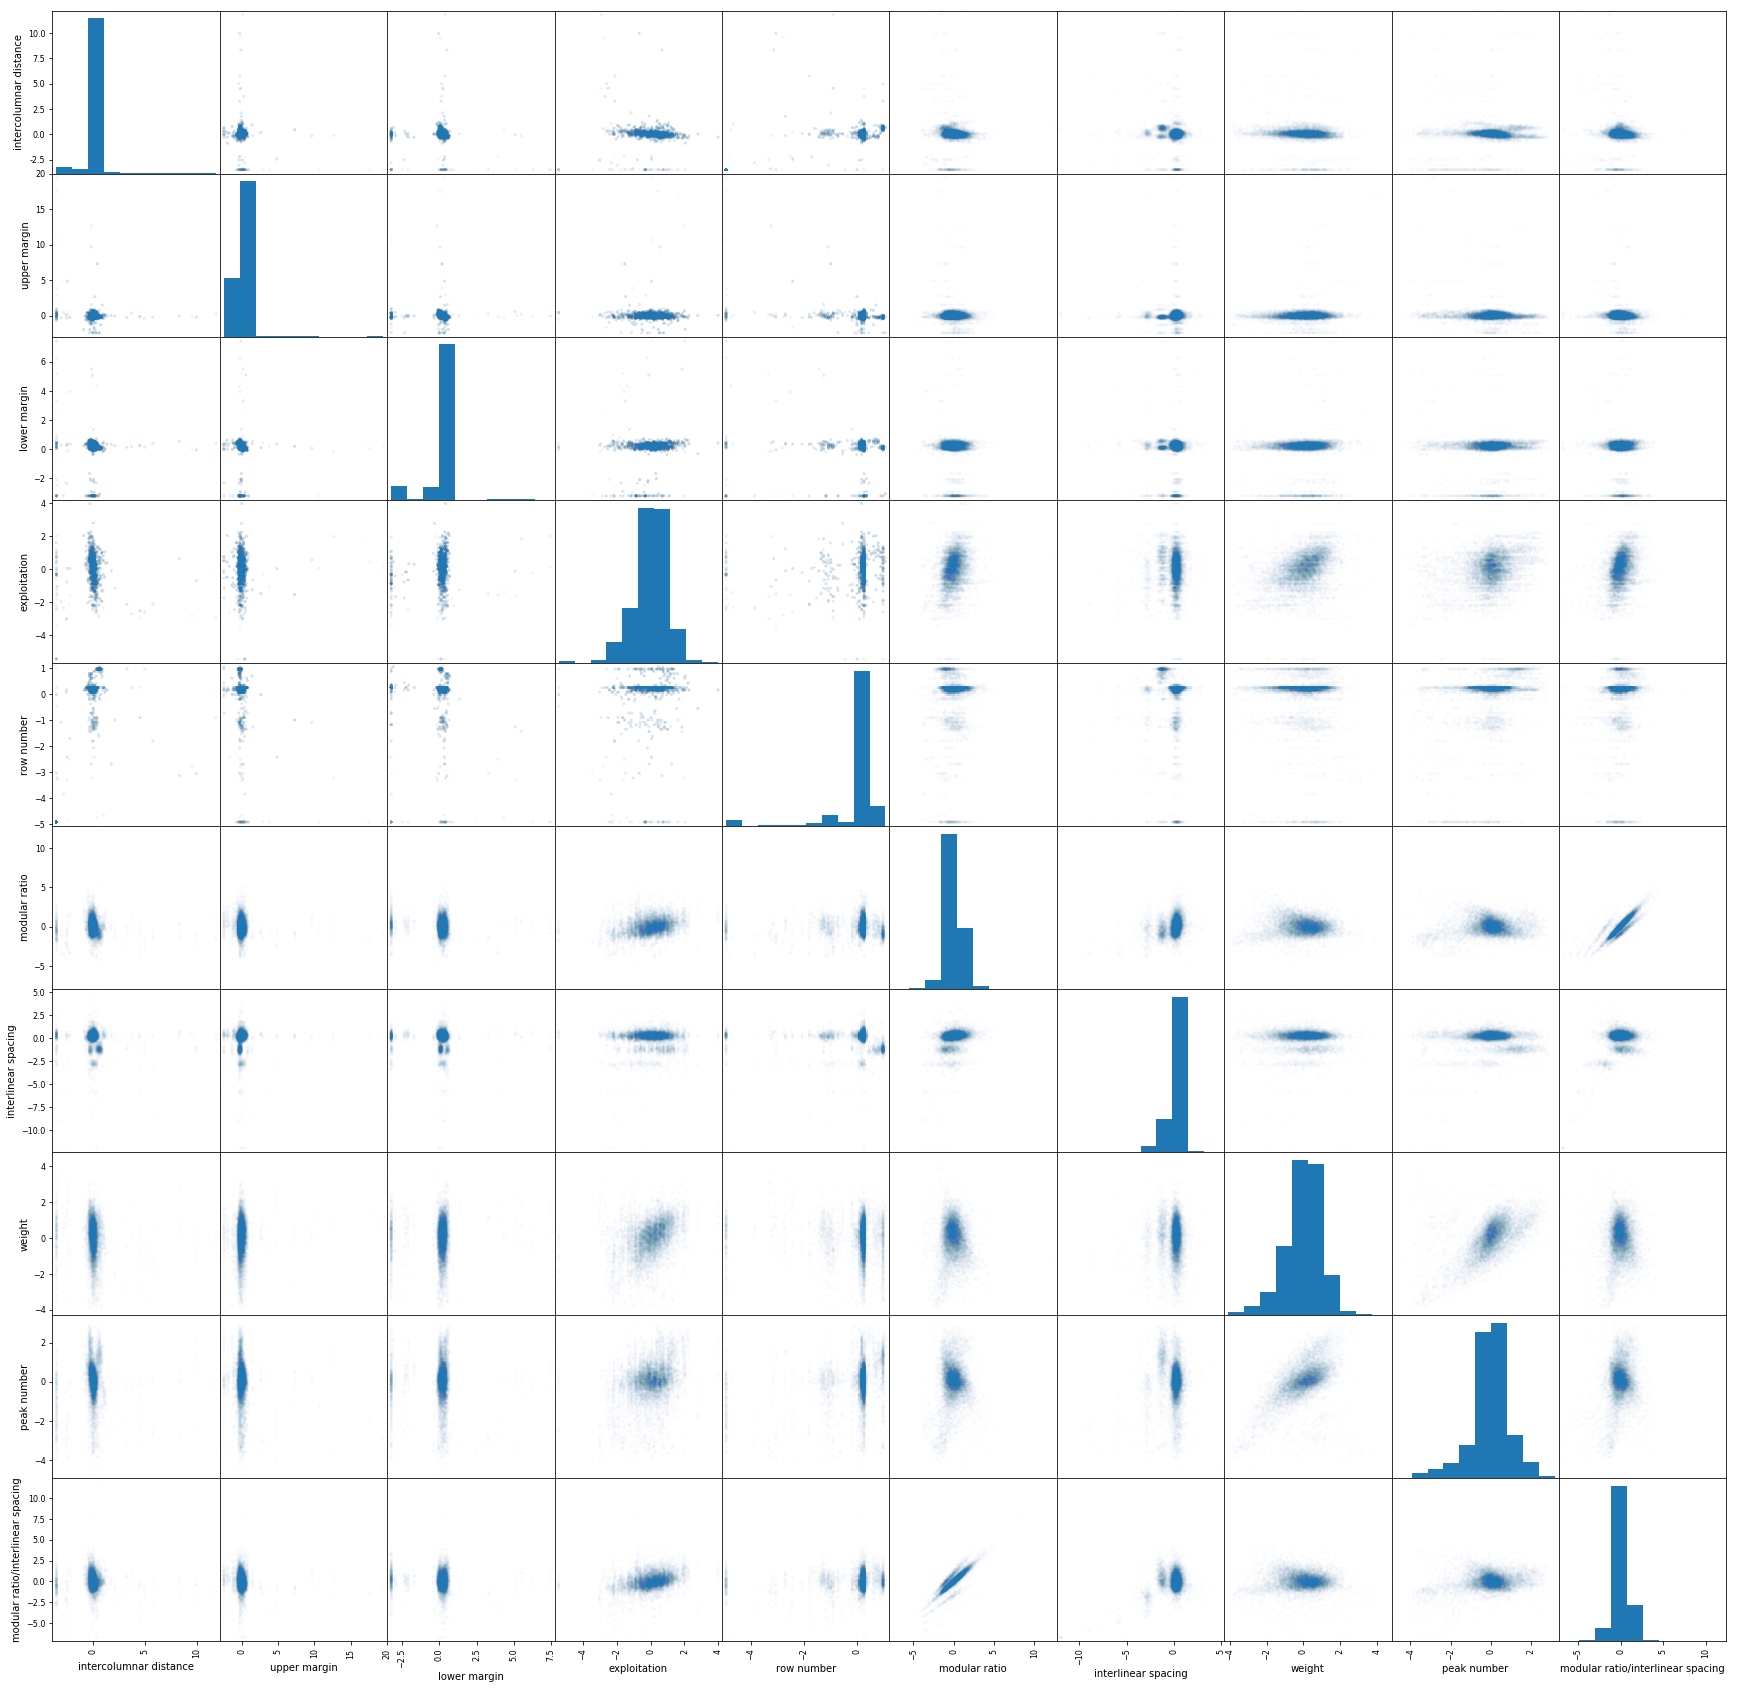

In [85]:
scatter_matrix(data_test, alpha = .01, figsize = (30, 30))
pass

In [86]:
data_test.corr()

,intercolumnar distance,upper margin,lower margin,exploitation,row number,modular ratio,interlinear spacing,weight,peak number,modular ratio/interlinear spacing
intercolumnar distance,1.000000,-0.123033,0.038813,-0.049063,0.444036,-0.063359,-0.060169,-0.071580,0.105847,-0.024933
upper margin,-0.123033,1.000000,-0.006647,-0.005815,-0.235551,-0.075325,0.026164,0.072306,-0.115176,-0.089183
lower margin,0.038813,-0.006647,1.000000,0.145215,0.012564,-0.090742,0.028558,0.030791,0.030612,-0.071287
exploitation,-0.049063,-0.005815,0.145215,1.000000,0.096532,0.278077,0.044803,0.378803,0.309869,0.331459
row number,0.444036,-0.235551,0.012564,0.096532,1.000000,0.043832,0.011562,-0.059734,0.298552,0.136844
modular ratio,-0.063359,-0.075325,-0.090742,0.278077,0.043832,1.000000,0.296635,-0.026265,0.068372,0.866538
interlinear spacing,-0.060169,0.026164,0.028558,0.044803,0.011562,0.296635,1.000000,0.034497,0.037851,0.298165
weight,-0.071580,0.072306,0.030791,0.378803,-0.059734,-0.026265,0.034497,1.000000,0.555522,0.019015
peak number,0.105847,-0.115176,0.030612,0.309869,0.298552,0.068372,0.037851,0.555522,1.000000,0.200293
modular ratio/interlinear spacing,-0.024933,-0.089183,-0.071287,0.331459,0.136844,0.866538,0.298165,0.019015,0.200293,1.000000


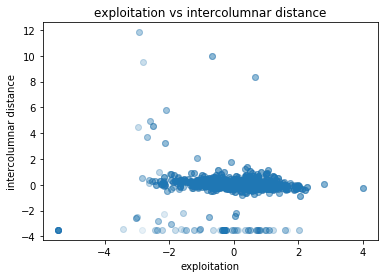

In [89]:
plt.plot(data_test['exploitation'], data_test['intercolumnar distance'], 'o', alpha = 0.05)
plt.xlabel('exploitation')
plt.ylabel('intercolumnar distance')
plt.title('exploitation vs intercolumnar distance')
pass

Фильтрация данных

In [90]:
data_test['exploitation'] < 0

0        False
1        False
2         True
3         True
4        False
5         True
6        False
7         True
8        False
9        False
10        True
11       False
12       False
13       False
14       False
15        True
16        True
17        True
18        True
19       False
20        True
21        True
22       False
23       False
24        True
25        True
26       False
27       False
28       False
29       False
         ...  
10407     True
10408    False
10409    False
10410    False
10411    False
10412     True
10413    False
10414    False
10415     True
10416    False
10417     True
10418     True
10419     True
10420     True
10421    False
10422    False
10423     True
10424    False
10425     True
10426    False
10427    False
10428    False
10429    False
10430    False
10431    False
10432    False
10433    False
10434     True
10435    False
10436    False
Name: exploitation, Length: 10437, dtype: bool

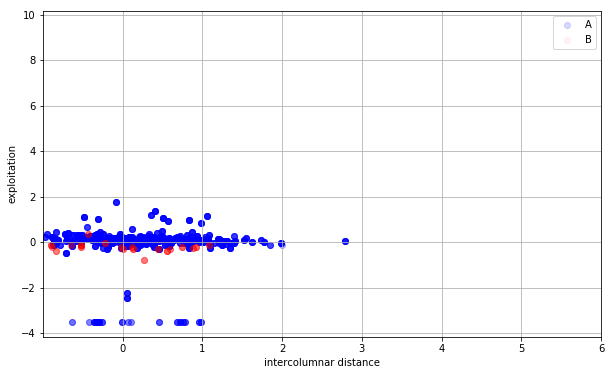

In [95]:
plt.figure(figsize = (10, 6))

plt.scatter(data_test[data_test['class'] == 'A']['exploitation'],
            data_test[data_test['class'] == 'A']['intercolumnar distance'],
            alpha = 0.15,
            label = 'A',
            color = 'b')

plt.scatter(data_test[data_test['class'] == 'D']['exploitation'],
            data_test[data_test['class'] == 'D']['intercolumnar distance'],
            alpha = 0.05,
            label = 'B',
            color = 'r')

plt.xlabel('intercolumnar distance')
plt.xticks(range(20))
plt.xlim(-1, 6)
plt.ylabel('exploitation')
plt.legend()
plt.grid()

Количественный и качественный анализы данных

In [96]:
data_test.describe(include = ['object'])

,class
count,10437
unique,12
top,A
freq,4286


In [97]:
data_test.describe(include = 'all')

,intercolumnar distance,upper margin,lower margin,exploitation,row number,modular ratio,interlinear spacing,weight,peak number,modular ratio/interlinear spacing,class
count,10437.000000,10437.000000,10437.000000,10437.000000,10437.000000,10437.000000,10437.000000,10437.000000,10437.000000,10437.000000,10437
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4286
mean,-0.000852,0.003396,0.005181,0.002616,-0.006365,-0.008886,0.002350,-0.010259,-0.008691,-0.000678,NaN
std,1.008551,0.955257,0.992430,0.991443,1.007876,1.000360,0.966827,0.996431,1.001240,0.992928,NaN
min,-3.498799,-2.426761,-3.210528,-5.440122,-4.922215,-7.450257,-11.935457,-4.090167,-4.737863,-6.719324,NaN
25%,-0.128929,-0.259834,0.064919,-0.526838,0.172340,-0.598658,-0.044076,-0.547709,-0.372457,-0.514199,NaN
50%,0.056229,-0.063555,0.217845,0.087408,0.261718,-0.058835,0.220177,0.103541,0.064084,-0.020397,NaN
75%,0.204355,0.203385,0.356544,0.627208,0.261718,0.564038,0.446679,0.639426,0.500624,0.526304,NaN


Виды библий в тестовой выборке

In [100]:
data_test['class'].unique()

array(['W', 'A', 'I', 'E', 'F', 'Y', 'H', 'D', 'G', 'X', 'C', 'B'],
      dtype=object)

Уровень exploitation в определенном виде библий

In [101]:
for name in data_test['class'].unique():
    print(name, data_test['exploitation'][data_test['class'] == name].iloc[0])

W 1.224178
A 0.410166
I -0.973663
E -0.213479
F -0.294311
Y 0.77052
H 0.29275300000000004
D -2.053711
G 0.010217
X 1.483948
C 0.681245
B 1.9930150000000002


## Подготовка данных

In [102]:
categorical_columns_test = [c for c in data_test.columns if data_test[c].dtype.name == 'object']
numerical_columns_test   = [c for c in data_test.columns if data_test[c].dtype.name != 'object']
print(categorical_columns_test)
print(numerical_columns_test)

['class']
['intercolumnar distance', 'upper margin', 'lower margin', 'exploitation', 'row number', 'modular ratio', 'interlinear spacing', 'weight', 'peak number', 'modular ratio/interlinear spacing']


In [103]:
categorical_columns_train = [c for c in data_train.columns if data_train[c].dtype.name == 'object']
numerical_columns_train   = [c for c in data_train.columns if data_train[c].dtype.name != 'object']
print(categorical_columns_train)
print(numerical_columns_train)

['class']
['intercolumnar distance', 'upper margin', 'lower margin', 'exploitation', 'row number', 'modular ratio', 'interlinear spacing', 'weight', 'peak number', 'modular ratio/interlinear spacing']


In [104]:
for c in categorical_columns_test:
    print(c, data_test[c].unique())

class ['W' 'A' 'I' 'E' 'F' 'Y' 'H' 'D' 'G' 'X' 'C' 'B']


In [105]:
for c in categorical_columns_train:
    print(c, data_train[c].unique())

class ['A' 'F' 'H' 'E' 'I' 'Y' 'D' 'X' 'G' 'W' 'C' 'B']


## Обработка пропущенных значений

In [106]:
data_test[numerical_columns_test].count(axis = 0)

intercolumnar distance               10437
upper margin                         10437
lower margin                         10437
exploitation                         10437
row number                           10437
modular ratio                        10437
interlinear spacing                  10437
weight                               10437
peak number                          10437
modular ratio/interlinear spacing    10437
dtype: int64

In [107]:
data_train[numerical_columns_train].count(axis = 0)

intercolumnar distance               10430
upper margin                         10430
lower margin                         10430
exploitation                         10430
row number                           10430
modular ratio                        10430
interlinear spacing                  10430
weight                               10430
peak number                          10430
modular ratio/interlinear spacing    10430
dtype: int64

In [108]:
data_test[categorical_columns_test].count(axis = 0)

class    10437
dtype: int64

In [109]:
data_train[categorical_columns_train].count(axis = 0)

class    10430
dtype: int64

Вывод: пропущенных значений нет.

## Векторизация

In [110]:
data_describe_test = data_test.describe(include = [object])
binary_columns_test    = [c for c in categorical_columns_test if data_describe_test[c]['unique'] == 2]
nonbinary_columns_test = [c for c in categorical_columns_test if data_describe_test[c]['unique'] > 2]
print(binary_columns_test, nonbinary_columns_test)

[] ['class']


In [111]:
data_describe_train = data_train.describe(include = [object])
binary_columns_train    = [c for c in categorical_columns_train if data_describe_train[c]['unique'] == 2]
nonbinary_columns_train = [c for c in categorical_columns_train if data_describe_train[c]['unique'] > 2]
print(binary_columns_train, nonbinary_columns_train)

[] ['class']


Векторизуемый небинарный признак

In [112]:
data_nonbinary_test = pd.get_dummies(data_test[nonbinary_columns_test])
print(data_nonbinary_test.columns)

Index(['class_A', 'class_B', 'class_C', 'class_D', 'class_E', 'class_F',
       'class_G', 'class_H', 'class_I', 'class_W', 'class_X', 'class_Y'],
      dtype='object')


In [113]:
data_nonbinary_train = pd.get_dummies(data_train[nonbinary_columns_train])
print(data_nonbinary_train.columns)

Index(['class_A', 'class_B', 'class_C', 'class_D', 'class_E', 'class_F',
       'class_G', 'class_H', 'class_I', 'class_W', 'class_X', 'class_Y'],
      dtype='object')


## Нормализация количественных признаков

In [114]:
data_numerical_test = data_test[numerical_columns_test]
data_numerical_test.describe()

,intercolumnar distance,upper margin,lower margin,exploitation,row number,modular ratio,interlinear spacing,weight,peak number,modular ratio/interlinear spacing
count,10437.000000,10437.000000,10437.000000,10437.000000,10437.000000,10437.000000,10437.000000,10437.000000,10437.000000,10437.000000
mean,-0.000852,0.003396,0.005181,0.002616,-0.006365,-0.008886,0.002350,-0.010259,-0.008691,-0.000678
std,1.008551,0.955257,0.992430,0.991443,1.007876,1.000360,0.966827,0.996431,1.001240,0.992928
min,-3.498799,-2.426761,-3.210528,-5.440122,-4.922215,-7.450257,-11.935457,-4.090167,-4.737863,-6.719324
25%,-0.128929,-0.259834,0.064919,-0.526838,0.172340,-0.598658,-0.044076,-0.547709,-0.372457,-0.514199
50%,0.056229,-0.063555,0.217845,0.087408,0.261718,-0.058835,0.220177,0.103541,0.064084,-0.020397
75%,0.204355,0.203385,0.356544,0.627208,0.261718,0.564038,0.446679,0.639426,0.500624,0.526304
max,11.819916,19.470188,7.458681,3.987152,1.066121,12.315569,4.901228,4.580832,3.213413,11.911338


In [115]:
data_numerical_train = data_train[numerical_columns_train]
data_numerical_train.describe()

,intercolumnar distance,upper margin,lower margin,exploitation,row number,modular ratio,interlinear spacing,weight,peak number,modular ratio/interlinear spacing
count,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000
mean,0.000852,0.033611,-0.000525,-0.002387,0.006370,0.013973,0.005605,0.010323,0.012914,0.000818
std,0.991431,3.920868,1.120202,1.008527,0.992053,1.126245,1.313754,1.003507,1.087665,1.007094
min,-3.498799,-2.426761,-3.210528,-5.440122,-4.922215,-7.450257,-11.935457,-4.247781,-5.486218,-6.719324
25%,-0.128929,-0.259834,0.064919,-0.528002,0.172340,-0.598658,-0.044076,-0.541992,-0.372457,-0.516097
50%,0.043885,-0.055704,0.217845,0.095763,0.261718,-0.058835,0.220177,0.111803,0.064084,-0.034513
75%,0.204355,0.203385,0.352988,0.658210,0.261718,0.564038,0.446679,0.654944,0.500624,0.530855
max,11.819916,386.000000,50.000000,3.987152,1.066121,53.000000,83.000000,13.173081,44.000000,4.671232


In [145]:
#data_numerical_test = (data_numerical_test - data_numerical_test.mean(axis = 0))/data_numerical_test.std(axis = 0)
data_numerical_test.describe()

,intercolumnar distance,upper margin,lower margin,exploitation,row number,modular ratio,interlinear spacing,weight,peak number,modular ratio/interlinear spacing
count,1.043700e+04,1.043700e+04,1.043700e+04,1.043700e+04,1.043700e+04,1.043700e+04,1.043700e+04,1.043700e+04,1.043700e+04,1.043700e+04
mean,1.701980e-18,-1.361584e-17,-1.565822e-17,3.540119e-17,-6.807921e-16,-2.280654e-16,-7.829109e-18,7.488713e-18,6.467525e-17,-1.089267e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.468289e+00,-2.543982e+00,-3.240239e+00,-5.489714e+00,-4.877436e+00,-7.438691e+00,-1.234741e+01,-4.094521e+00,-4.723317e+00,-6.766500e+00
25%,-1.269912e-01,-2.755590e-01,6.019352e-02,-5.340236e-01,1.773087e-01,-5.895598e-01,-4.801896e-02,-5.393747e-01,-3.633158e-01,-5.171782e-01
50%,5.659690e-02,-7.008656e-02,2.142861e-01,8.552401e-02,2.659883e-01,-4.993124e-02,2.253009e-01,1.142079e-01,7.268471e-02,-1.985900e-02
75%,2.034670e-01,2.093565e-01,3.540431e-01,6.299830e-01,2.659883e-01,5.727174e-01,4.595746e-01,6.520123e-01,5.086843e-01,5.307359e-01
max,1.172054e+01,2.037859e+01,7.510356e+00,4.018927e+00,1.064105e+00,1.232002e+01,5.066966e+00,4.607536e+00,3.218115e+00,1.199686e+01


In [147]:
#data_numerical_train = (data_numerical_train - data_numerical_train.mean(axis = 0))/data_numerical_train.std(axis = 0)
data_numerical_train.describe()

,intercolumnar distance,upper margin,lower margin,exploitation,row number,modular ratio,interlinear spacing,weight,peak number,modular ratio/interlinear spacing
count,1.043000e+04,1.043000e+04,1.043000e+04,1.043000e+04,1.043000e+04,1.043000e+04,1.043000e+04,1.043000e+04,1.043000e+04,1.043000e+04
mean,-4.870931e-17,1.294373e-17,-1.130873e-16,-5.722492e-17,-2.188513e-16,-5.109368e-17,3.338120e-17,1.481717e-17,2.384372e-16,1.907497e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.529898e+00,-6.275068e-01,-2.865557e+00,-5.391762e+00,-4.968064e+00,-6.627536e+00,-9.089266e+00,-4.243222e+00,-5.055904e+00,-6.672805e+00
25%,-1.309031e-01,-7.484173e-02,5.842191e-02,-5.211715e-01,1.672999e-01,-5.439587e-01,-3.781636e-02,-5.503838e-01,-3.543103e-01,-5.132738e-01
50%,4.340447e-02,-2.277929e-02,1.949384e-01,9.731986e-02,2.573939e-01,-6.464655e-02,1.633270e-01,1.011258e-01,4.704562e-02,-3.508185e-02
75%,2.052614e-01,4.330020e-02,3.155800e-01,6.550117e-01,2.573939e-01,4.884062e-01,3.357352e-01,6.423689e-01,4.484006e-01,5.263035e-01
max,1.192121e+01,9.843900e+01,4.463528e+01,3.955809e+00,1.068240e+00,4.704662e+01,6.317345e+01,1.311676e+01,4.044174e+01,4.637516e+00


## Создаем единую таблицу

In [148]:
print(data_numerical_test.shape)
data_numerical_test.describe()

(10437, 10)


,intercolumnar distance,upper margin,lower margin,exploitation,row number,modular ratio,interlinear spacing,weight,peak number,modular ratio/interlinear spacing
count,1.043700e+04,1.043700e+04,1.043700e+04,1.043700e+04,1.043700e+04,1.043700e+04,1.043700e+04,1.043700e+04,1.043700e+04,1.043700e+04
mean,1.701980e-18,-1.361584e-17,-1.565822e-17,3.540119e-17,-6.807921e-16,-2.280654e-16,-7.829109e-18,7.488713e-18,6.467525e-17,-1.089267e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.468289e+00,-2.543982e+00,-3.240239e+00,-5.489714e+00,-4.877436e+00,-7.438691e+00,-1.234741e+01,-4.094521e+00,-4.723317e+00,-6.766500e+00
25%,-1.269912e-01,-2.755590e-01,6.019352e-02,-5.340236e-01,1.773087e-01,-5.895598e-01,-4.801896e-02,-5.393747e-01,-3.633158e-01,-5.171782e-01
50%,5.659690e-02,-7.008656e-02,2.142861e-01,8.552401e-02,2.659883e-01,-4.993124e-02,2.253009e-01,1.142079e-01,7.268471e-02,-1.985900e-02
75%,2.034670e-01,2.093565e-01,3.540431e-01,6.299830e-01,2.659883e-01,5.727174e-01,4.595746e-01,6.520123e-01,5.086843e-01,5.307359e-01
max,1.172054e+01,2.037859e+01,7.510356e+00,4.018927e+00,1.064105e+00,1.232002e+01,5.066966e+00,4.607536e+00,3.218115e+00,1.199686e+01


In [149]:
print(data_numerical_train.shape)
data_numerical_train.describe()

(10430, 10)


,intercolumnar distance,upper margin,lower margin,exploitation,row number,modular ratio,interlinear spacing,weight,peak number,modular ratio/interlinear spacing
count,1.043000e+04,1.043000e+04,1.043000e+04,1.043000e+04,1.043000e+04,1.043000e+04,1.043000e+04,1.043000e+04,1.043000e+04,1.043000e+04
mean,-4.870931e-17,1.294373e-17,-1.130873e-16,-5.722492e-17,-2.188513e-16,-5.109368e-17,3.338120e-17,1.481717e-17,2.384372e-16,1.907497e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.529898e+00,-6.275068e-01,-2.865557e+00,-5.391762e+00,-4.968064e+00,-6.627536e+00,-9.089266e+00,-4.243222e+00,-5.055904e+00,-6.672805e+00
25%,-1.309031e-01,-7.484173e-02,5.842191e-02,-5.211715e-01,1.672999e-01,-5.439587e-01,-3.781636e-02,-5.503838e-01,-3.543103e-01,-5.132738e-01
50%,4.340447e-02,-2.277929e-02,1.949384e-01,9.731986e-02,2.573939e-01,-6.464655e-02,1.633270e-01,1.011258e-01,4.704562e-02,-3.508185e-02
75%,2.052614e-01,4.330020e-02,3.155800e-01,6.550117e-01,2.573939e-01,4.884062e-01,3.357352e-01,6.423689e-01,4.484006e-01,5.263035e-01
max,1.192121e+01,9.843900e+01,4.463528e+01,3.955809e+00,1.068240e+00,4.704662e+01,6.317345e+01,1.311676e+01,4.044174e+01,4.637516e+00


In [150]:
X_test = data_numerical_test
y_test = data_test.iloc[:,-1]
X_train = data_numerical_train
y_train = data_train.iloc[:,-1]
print(X_test.shape)
print(y_test.shape)
print(X_train.shape)
print(y_train.shape)

(10437, 10)
(10437,)
(10430, 10)
(10430,)


## Обучение

#### kNN

In [151]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
#knn.set_params(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

In [152]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

In [153]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

0.24554170661553212 0.2899300565296541


Вывод: переобучили, либо не правильно подобрали параметр k

In [154]:
err_test = 1 - knn.score(X_test, y_test)
print(err_test)

0.2899300565296541


In [155]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))

[[3702    0    0   14   55  416   61   26    3    0    5    4]
 [   0    4    1    0    0    0    0    0    0    0    0    0]
 [  52    0    7    4   21   15    0    3    1    0    0    0]
 [ 139    0    0  118   35   52    1    6    1    0    1    0]
 [ 268    0    1   20  652   74   13   41    1    0   22    3]
 [ 779    6    0    9   21 1086   42   14    3    0    0    2]
 [ 125    0    0    0   20   68  218   12    0    0    4    0]
 [ 141    0    0    0   49   50   25  252    1    0    2    0]
 [  41    0    0    0   13    4    3    0  756    7    2    6]
 [  25    0    0    0    2    1    0    0    0   15    2    0]
 [  39    0    0    1   21    1    0    5    4    1  425   25]
 [  29    0    0    0    7    0    0    0   29    0   26  176]]


In [156]:
confusion_matrix([0,1,0,1,0], [0,1,0,0,0])

array([[3, 0],
       [1, 1]], dtype=int64)

Подберем параметры для kNN

In [157]:
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=5)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.2891658676893576 1


In [158]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.0 0.27354603813356326


#### SVC

In [159]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))

print(err_train, err_test)

c:\users\lyzzerg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.28609779482262704 0.29117562517964934


# Лабораторная работа №2 - Нейронные  сети

### Подготовка данных

In [5]:
data_test = pd.read_csv('data/avila-ts.csv', sep = ',', engine = 'python')
data_train = pd.read_csv('data/avila-tr.csv', sep = ',', engine = 'python')

categorical_columns_test = [c for c in data_test.columns if data_test[c].dtype.name == 'object']
numerical_columns_test   = [c for c in data_test.columns if data_test[c].dtype.name != 'object']

categorical_columns_train = [c for c in data_train.columns if data_train[c].dtype.name == 'object']
numerical_columns_train   = [c for c in data_train.columns if data_train[c].dtype.name != 'object']

data_numerical_test = data_test[numerical_columns_test]
data_numerical_train = data_train[numerical_columns_train]

data_numerical_test = (data_numerical_test - data_numerical_test.mean(axis = 0))/data_numerical_test.std(axis = 0)
data_numerical_train = (data_numerical_train - data_numerical_train.mean(axis = 0))/data_numerical_train.std(axis = 0)

from sklearn import preprocessing
X_test = data_numerical_test
y_test = data_test.iloc[:,-1]
X_train = data_numerical_train
y_train = data_train.iloc[:,-1]

print(X_test.shape)
print(y_test.shape)
print(X_train.shape)
print(y_train.shape)

(10437, 10)
(10437,)
(10430, 10)
(10430,)


### Обучение классификатора

In [6]:
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes = (50,6), solver = 'lbfgs', 
                          activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50, 6), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=42, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

### Проверка предсказания

In [165]:
Num = 150
Test_experiment = X_test.values[Num]
Result = y_test[Num]
print("result = ", Result)
mlp_model.predict([Test_experiment])

result =  A


array(['A'], dtype='<U1')

### Качество сетки

In [166]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

0.26807286673058484 0.38919229663696464


### Подбираем гиперпараметры

In [168]:
alpha_arr = np.logspace(-3, 2, 21)
test_err = []
train_err = []
for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (50,6), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

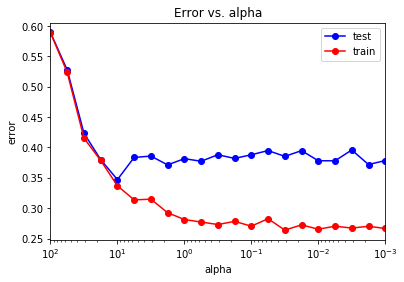

In [169]:
plt.semilogx(alpha_arr, test_err, 'b-o', label = 'test')
plt.semilogx(alpha_arr, train_err, 'r-o', label = 'train')
plt.xlim([np.max(alpha_arr), np.min(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass

In [207]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print("Минимальное значение ошибки")
print(min_train_err, min_test_err)
print("Оптимальное значение alpha")
alpha_opt = alpha_arr[test_err == min_test_err]
print(alpha_opt)

Минимальное значение ошибки
0.2638542665388303 0.3470345884832806
Оптимальное значение alpha
[10.]


### Обучение с оптимальной alpha

In [208]:
alpha_opt = alpha_opt[0]
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (50,6),
                          solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

0.336816874400767
0.3470345884832806


### Посмотрим матрицу рассогласования и другие метрики

In [199]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_pred, y_test))

[[3702    0   27  141  172 1136  150  159   27   30   37   26]
 [   0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    2    1    0    0    0    0    0    0    0]
 [ 130    0   49  178  805   51   42   53    0   10   38   11]
 [ 353    0   20   28   40  703   90   52    2    0    1    5]
 [   0    2    0    0    0    0    0    0    0    0    0    0]
 [  75    3    6    1   18   57  159  245    0    0    0    2]
 [   9    0    0    0    0   10    0    4  781    0    0   24]
 [   0    0    0    0    0    0    0    0    0    0    0    0]
 [  14    0    0    3   52    0    6    6   16    5  420   42]
 [   3    0    1    0    7    5    0    1    6    0   26  157]]


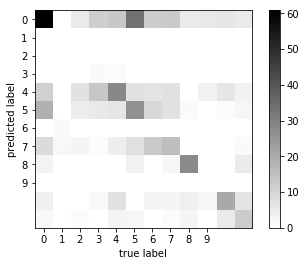

In [200]:
M = confusion_matrix(y_test_pred, y_test)
M = np.sqrt(M)
plt.imshow(M, interpolation = 'nearest')
plt.set_cmap('binary')
plt.xticks(range(10))
plt.yticks(range(10))
plt.xlabel("true label")
plt.ylabel("predicted label")
plt.colorbar()
pass

In [203]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           A       0.66      0.86      0.75      4286
           B       0.00      0.00      0.00         5
           C       0.00      0.00      0.00       103
           D       0.67      0.01      0.01       353
           E       0.59      0.74      0.65      1095
           F       0.54      0.36      0.43      1962
           G       0.00      0.00      0.00       447
           H       0.43      0.47      0.45       520
           I       0.94      0.94      0.94       832
           W       0.00      0.00      0.00        45
           X       0.74      0.80      0.77       522
           Y       0.76      0.59      0.66       267

   micro avg       0.65      0.65      0.65     10437
   macro avg       0.45      0.40      0.39     10437
weighted avg       0.61      0.65      0.61     10437



### Сборник ошибок

In [209]:
N_test, _ = X_test.shape
for i in range(N_test):
    Test_experiment = X_test.values[i]
    Result = y_test[i]
    Prediction = mlp_model.predict([Test_experiment])[0]
    if Result != Prediction:
        print(i, Result, Prediction)

0 W A
1 A X
2 I A
5 F A
9 H A
15 D E
21 F A
24 F A
26 F A
27 G H
33 F A
34 Y I
35 D E
36 E A
43 F A
48 F A
50 I X
54 D A
56 F A
58 H F
60 F A
66 E A
67 G H
68 F A
73 F A
75 F A
82 G H
87 F A
88 A F
89 A F
90 F A
91 A F
94 F A
99 D A
100 E A
101 C E
105 F A
109 E X
113 F A
114 G A
115 H E
120 F A
122 E A
123 F A
128 D A
129 C A
133 F A
135 D E
137 G H
138 D E
142 H F
143 A E
145 F A
146 A F
147 F A
151 E A
153 X E
155 D E
157 G A
162 Y I
163 F A
166 F A
173 G H
174 A F
178 D A
179 A F
180 E A
181 F A
190 A F
193 G E
194 F A
198 G F
200 I X
201 D E
205 F A
210 G A
211 A F
213 F A
215 E A
216 A H
217 F A
220 D E
221 H X
225 F A
230 C E
235 F A
238 H E
239 A E
240 F A
241 G H
243 E A
246 F H
247 Y I
251 X E
252 G F
254 F A
258 E X
267 G A
270 W E
275 D E
279 C F
280 G F
285 A E
292 D E
295 G A
299 F H
300 A F
302 A H
304 D E
305 E A
306 G H
308 F A
313 I A
316 H A
317 F A
318 G H
320 F A
321 W X
324 F E
329 D A
330 C A
336 F A
339 X Y
340 G A
344 F A
345 H A
347 A F
349 F E
356 A F
359 D A

3309 F I
3315 F A
3317 F A
3320 C E
3322 F A
3323 D A
3324 F A
3325 G F
3330 G A
3332 D E
3339 F A
3340 D E
3341 A H
3344 A F
3350 E F
3360 H F
3361 G A
3365 F A
3366 A E
3371 H F
3375 E F
3381 G A
3382 A F
3385 H I
3386 F A
3388 C A
3389 X Y
3390 E X
3391 F A
3393 A E
3395 Y X
3397 F A
3398 E F
3399 A F
3400 A E
3401 F A
3402 X A
3404 F A
3411 F A
3412 G E
3417 Y A
3424 A F
3428 W A
3431 D E
3432 E H
3435 H E
3436 G A
3438 E A
3439 F A
3440 X A
3441 F A
3446 A F
3448 F A
3450 D A
3452 F A
3455 A F
3457 G A
3458 F A
3463 F H
3469 H F
3471 F A
3477 F A
3478 X E
3479 G A
3483 F A
3485 F A
3489 F A
3490 D A
3492 I A
3499 F A
3501 F A
3503 G A
3508 F E
3510 W A
3518 D E
3522 A F
3523 F A
3524 G A
3527 F A
3529 C E
3535 F A
3538 F A
3543 F A
3545 H F
3549 G A
3550 A F
3552 F A
3556 G H
3557 F A
3558 X Y
3559 H F
3564 D F
3568 A E
3569 G F
3571 X Y
3574 F H
3576 G A
3578 G F
3580 F A
3581 H A
3582 A E
3585 G A
3586 F A
3592 F A
3599 D E
3600 F A
3603 G X
3604 A H
3609 A F
3610 F A
3618 H A
3

6674 G A
6675 A F
6677 X Y
6678 A F
6680 F A
6682 F A
6683 F A
6688 G A
6693 G H
6696 A F
6703 C A
6705 A E
6706 H A
6707 G A
6709 X E
6713 F A
6717 F A
6719 E F
6721 F A
6722 A F
6725 D E
6728 A E
6730 E X
6735 F H
6736 E F
6737 G H
6738 F A
6742 F A
6743 E A
6745 A F
6749 F A
6750 C Y
6753 G H
6754 Y X
6755 F A
6764 G A
6766 F A
6770 A E
6772 F A
6777 F A
6780 D A
6784 E A
6785 W E
6789 A H
6790 F A
6791 G H
6792 E X
6801 F A
6802 F A
6808 D A
6815 F A
6818 C A
6822 F A
6826 G F
6827 F A
6830 A F
6837 G H
6842 Y E
6845 X E
6846 A F
6851 E X
6852 H A
6857 G A
6858 I Y
6859 F A
6861 D A
6862 F A
6867 F A
6870 E H
6871 G F
6873 F A
6874 F A
6877 E X
6878 A I
6883 F A
6884 C F
6886 F A
6889 A F
6895 F A
6896 A F
6898 H F
6900 G A
6903 D A
6904 H A
6907 X A
6909 Y X
6913 H E
6918 X A
6920 F A
6926 A F
6931 D E
6936 G H
6937 H F
6939 F A
6942 F A
6943 E A
6945 B G
6947 A F
6948 F E
6953 X A
6955 E A
6961 D E
6966 A H
6972 F A
6974 E A
6977 F A
6978 F H
6983 H A
6984 A E
6985 G A
6986 E X
6

10284 G E
10285 F A
10289 A F
10291 F A
10294 F A
10296 A F
10298 H A
10299 A F
10300 E F
10308 D A
10314 F A
10315 D A
10318 G H
10320 F A
10321 F A
10324 A F
10325 F A
10329 F A
10331 A F
10333 X A
10335 A E
10337 F A
10338 A E
10339 G H
10342 Y F
10343 I A
10344 A E
10353 A F
10354 G A
10356 D F
10358 F H
10360 H E
10362 F A
10364 D F
10366 C E
10368 G F
10374 Y X
10376 D A
10377 A F
10378 F I
10379 A F
10380 G A
10382 A F
10386 F A
10388 E A
10389 F A
10390 F A
10393 H A
10395 F A
10396 A H
10397 A H
10400 F A
10402 A F
10410 H A
10418 A H
10428 D A
10429 F A
10433 G H
10436 H A


### Метод научного глядения

1) Изменяем `alpha` и `max_iter`

In [245]:
alpha_type = 0.6
max_iter_type = 700

mlp_model = MLPClassifier(alpha = alpha_type, hidden_layer_sizes = (50, 6),
                          solver = 'lbfgs', activation = 'logistic', random_state = 38, max_iter=max_iter_type)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(alpha_type, ":", max_iter_type, ":", np.mean(y_train != y_train_pred), ";", np.mean(y_test != y_test_pred))

0.6 : 700 : 0.18935762224352828 ; 0.32921337549104146


Вывод: лучший результат `alpha = 0.6` и `max_iter = 700`

2) Изменяем функцию активации

In [249]:
type_activation = 'logistic'
mlp_model = MLPClassifier(alpha = 0.6, hidden_layer_sizes = (50,6),
                          solver = 'lbfgs', activation = type_activation, random_state = 38, max_iter=700)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(type_activation, ":", np.mean(y_train != y_train_pred), ";", np.mean(y_test != y_test_pred))

logistic : 0.18935762224352828 ; 0.32921337549104146


Вывод: самая оптимальная функция - `logistic`

3) Изменяем решение весов

In [252]:
type_solver = 'lbfgs'
mlp_model = MLPClassifier(alpha = 0.6, hidden_layer_sizes = (50,6),
                          solver = type_solver, activation = 'logistic', random_state = 38, max_iter=700)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(type_solver, ":", np.mean(y_train != y_train_pred), ";", np.mean(y_test != y_test_pred))

lbfgs : 0.18935762224352828 ; 0.32921337549104146


Вывод: самый оптимальный решатель - `lbfgs`

4) Изменяем random_state

In [253]:
random_state = 38

mlp_model = MLPClassifier(alpha = 0.6, hidden_layer_sizes = (50,6),
                          solver = 'lbfgs', activation = 'logistic', random_state = random_state, max_iter=700)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print("random_state =", random_state, ":", np.mean(y_train != y_train_pred), ";", np.mean(y_test != y_test_pred))

random_state = 38 : 0.18935762224352828 ; 0.32921337549104146


Вывод: самый оптимальный параметр `random_state = 38`

4) Изменяем слои

In [254]:
type_hidden_layer = (50,6)

mlp_model = MLPClassifier(alpha = 0.6, hidden_layer_sizes = type_hidden_layer,
                          solver = 'lbfgs', activation = 'logistic', random_state = 38, max_iter=700)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(type_hidden_layer, ":", np.mean(y_train != y_train_pred), ";", np.mean(y_test != y_test_pred))

(50, 6) : 0.18935762224352828 ; 0.32921337549104146


Вывод: самая оптимальная модель `(50, 6)`

#### Лучшая версия прогонки

In [255]:
mlp_model = MLPClassifier(alpha = 0.6, hidden_layer_sizes = (50, 6),
                          solver = 'lbfgs', activation = 'logistic', random_state = 38, max_iter=700)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred), ";", np.mean(y_test != y_test_pred))

0.18935762224352828 ; 0.32921337549104146


### Ограниченная машина Больцмана

In [256]:
from sklearn.neural_network import BernoulliRBM
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

RBM_model = BernoulliRBM(learning_rate=0.0001, batch_size = 200, n_iter=600, random_state=38, verbose=20)
logistic = LogisticRegression(solver='lbfgs', multi_class='auto')
classifier_RBM = Pipeline(steps=[('RBM_model', RBM_model), ('logistic', logistic)])
classifier_RBM.fit(X_train, y_train)

y_train_pred = classifier_RBM.predict(X_train)
y_test_pred = classifier_RBM.predict(X_test)

print(np.mean(y_train != y_train_pred), ";", np.mean(y_test != y_test_pred))

[BernoulliRBM] Iteration 1, pseudo-likelihood = -6.34, time = 0.15s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -5.82, time = 0.34s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -5.50, time = 0.33s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -5.31, time = 0.34s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -5.19, time = 0.33s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -5.13, time = 0.33s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -5.10, time = 0.32s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -5.10, time = 0.32s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -5.11, time = 0.32s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -5.13, time = 0.32s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -5.17, time = 0.32s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -5.21, time = 0.32s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -5.25, time = 0.32s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -5.30, time = 0.32s
[BernoulliRBM] Iteration 15, pseudo-likelih

[BernoulliRBM] Iteration 120, pseudo-likelihood = -9.03, time = 0.32s
[BernoulliRBM] Iteration 121, pseudo-likelihood = -9.06, time = 0.32s
[BernoulliRBM] Iteration 122, pseudo-likelihood = -9.08, time = 0.32s
[BernoulliRBM] Iteration 123, pseudo-likelihood = -9.11, time = 0.32s
[BernoulliRBM] Iteration 124, pseudo-likelihood = -9.13, time = 0.32s
[BernoulliRBM] Iteration 125, pseudo-likelihood = -9.16, time = 0.31s
[BernoulliRBM] Iteration 126, pseudo-likelihood = -9.19, time = 0.31s
[BernoulliRBM] Iteration 127, pseudo-likelihood = -9.21, time = 0.32s
[BernoulliRBM] Iteration 128, pseudo-likelihood = -9.24, time = 0.32s
[BernoulliRBM] Iteration 129, pseudo-likelihood = -9.26, time = 0.32s
[BernoulliRBM] Iteration 130, pseudo-likelihood = -9.29, time = 0.31s
[BernoulliRBM] Iteration 131, pseudo-likelihood = -9.31, time = 0.32s
[BernoulliRBM] Iteration 132, pseudo-likelihood = -9.34, time = 0.31s
[BernoulliRBM] Iteration 133, pseudo-likelihood = -9.36, time = 0.32s
[BernoulliRBM] Itera

[BernoulliRBM] Iteration 236, pseudo-likelihood = -11.98, time = 0.31s
[BernoulliRBM] Iteration 237, pseudo-likelihood = -12.01, time = 0.32s
[BernoulliRBM] Iteration 238, pseudo-likelihood = -12.04, time = 0.31s
[BernoulliRBM] Iteration 239, pseudo-likelihood = -12.06, time = 0.31s
[BernoulliRBM] Iteration 240, pseudo-likelihood = -12.09, time = 0.32s
[BernoulliRBM] Iteration 241, pseudo-likelihood = -12.12, time = 0.32s
[BernoulliRBM] Iteration 242, pseudo-likelihood = -12.14, time = 0.32s
[BernoulliRBM] Iteration 243, pseudo-likelihood = -12.17, time = 0.32s
[BernoulliRBM] Iteration 244, pseudo-likelihood = -12.20, time = 0.32s
[BernoulliRBM] Iteration 245, pseudo-likelihood = -12.22, time = 0.31s
[BernoulliRBM] Iteration 246, pseudo-likelihood = -12.25, time = 0.32s
[BernoulliRBM] Iteration 247, pseudo-likelihood = -12.28, time = 0.32s
[BernoulliRBM] Iteration 248, pseudo-likelihood = -12.31, time = 0.32s
[BernoulliRBM] Iteration 249, pseudo-likelihood = -12.33, time = 0.32s
[Berno

[BernoulliRBM] Iteration 352, pseudo-likelihood = -15.45, time = 0.32s
[BernoulliRBM] Iteration 353, pseudo-likelihood = -15.48, time = 0.32s
[BernoulliRBM] Iteration 354, pseudo-likelihood = -15.51, time = 0.32s
[BernoulliRBM] Iteration 355, pseudo-likelihood = -15.55, time = 0.32s
[BernoulliRBM] Iteration 356, pseudo-likelihood = -15.58, time = 0.31s
[BernoulliRBM] Iteration 357, pseudo-likelihood = -15.61, time = 0.32s
[BernoulliRBM] Iteration 358, pseudo-likelihood = -15.65, time = 0.31s
[BernoulliRBM] Iteration 359, pseudo-likelihood = -15.68, time = 0.31s
[BernoulliRBM] Iteration 360, pseudo-likelihood = -15.71, time = 0.31s
[BernoulliRBM] Iteration 361, pseudo-likelihood = -15.75, time = 0.31s
[BernoulliRBM] Iteration 362, pseudo-likelihood = -15.78, time = 0.31s
[BernoulliRBM] Iteration 363, pseudo-likelihood = -15.82, time = 0.32s
[BernoulliRBM] Iteration 364, pseudo-likelihood = -15.85, time = 0.32s
[BernoulliRBM] Iteration 365, pseudo-likelihood = -15.88, time = 0.32s
[Berno

[BernoulliRBM] Iteration 468, pseudo-likelihood = -19.78, time = 0.31s
[BernoulliRBM] Iteration 469, pseudo-likelihood = -19.82, time = 0.31s
[BernoulliRBM] Iteration 470, pseudo-likelihood = -19.86, time = 0.32s
[BernoulliRBM] Iteration 471, pseudo-likelihood = -19.91, time = 0.32s
[BernoulliRBM] Iteration 472, pseudo-likelihood = -19.95, time = 0.31s
[BernoulliRBM] Iteration 473, pseudo-likelihood = -19.99, time = 0.31s
[BernoulliRBM] Iteration 474, pseudo-likelihood = -20.03, time = 0.31s
[BernoulliRBM] Iteration 475, pseudo-likelihood = -20.07, time = 0.31s
[BernoulliRBM] Iteration 476, pseudo-likelihood = -20.12, time = 0.32s
[BernoulliRBM] Iteration 477, pseudo-likelihood = -20.16, time = 0.31s
[BernoulliRBM] Iteration 478, pseudo-likelihood = -20.20, time = 0.33s
[BernoulliRBM] Iteration 479, pseudo-likelihood = -20.24, time = 0.32s
[BernoulliRBM] Iteration 480, pseudo-likelihood = -20.28, time = 0.33s
[BernoulliRBM] Iteration 481, pseudo-likelihood = -20.33, time = 0.32s
[Berno

[BernoulliRBM] Iteration 584, pseudo-likelihood = -25.09, time = 0.31s
[BernoulliRBM] Iteration 585, pseudo-likelihood = -25.14, time = 0.31s
[BernoulliRBM] Iteration 586, pseudo-likelihood = -25.19, time = 0.32s
[BernoulliRBM] Iteration 587, pseudo-likelihood = -25.24, time = 0.32s
[BernoulliRBM] Iteration 588, pseudo-likelihood = -25.29, time = 0.32s
[BernoulliRBM] Iteration 589, pseudo-likelihood = -25.34, time = 0.32s
[BernoulliRBM] Iteration 590, pseudo-likelihood = -25.39, time = 0.33s
[BernoulliRBM] Iteration 591, pseudo-likelihood = -25.44, time = 0.32s
[BernoulliRBM] Iteration 592, pseudo-likelihood = -25.49, time = 0.31s
[BernoulliRBM] Iteration 593, pseudo-likelihood = -25.54, time = 0.31s
[BernoulliRBM] Iteration 594, pseudo-likelihood = -25.59, time = 0.32s
[BernoulliRBM] Iteration 595, pseudo-likelihood = -25.64, time = 0.32s
[BernoulliRBM] Iteration 596, pseudo-likelihood = -25.69, time = 0.32s
[BernoulliRBM] Iteration 597, pseudo-likelihood = -25.75, time = 0.32s
[Berno

c:\users\lyzzerg\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Вывод: пока получилась ошибка `0.50`

# Лабораторная работа №3 - Деревья решений

### Random Forest

In [258]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print(err_train, err_test)

0.0 0.17447542397240587


#### Подбираем параметр `n_estimators`

Minimum error on test data:  0.17255916451087477


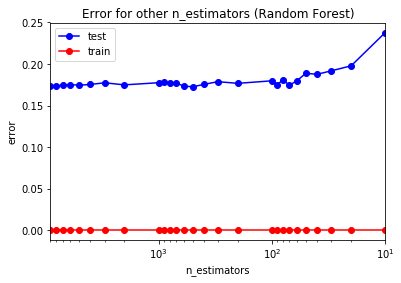

In [259]:
estimators = list(range(10, 100, 10)) + list(range(100, 1000, 100)) + list(range(1000, 10000, 1000))
test_err = []
train_err = []

for elem in estimators:
    rf_temp = ensemble.RandomForestClassifier(n_estimators = elem).fit(X_train, y_train)

    y_train_pred = rf_temp.predict(X_train)
    y_test_pred = rf_temp.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    
plt.semilogx(estimators, test_err, 'b-o', label = 'test')
plt.semilogx(estimators, train_err, 'r-o', label = 'train')
plt.xlim([np.max(estimators), np.min(estimators)])
plt.title('Error for other n_estimators (Random Forest)')
plt.xlabel('n_estimators')
plt.ylabel('error')
plt.legend()
pass

print("Minimum error on test data: ", np.min(test_err))

### Extremely Randomized Trees

In [260]:
ert = ensemble.ExtraTreesClassifier(n_estimators = 100).fit(X_train, y_train)

err_train = np.mean(y_train != ert.predict(X_train))
err_test  = np.mean(y_test  != ert.predict(X_test))

print(err_train, err_test)

0.0 0.12618568554182236


#### Подбираем параметр `n_estimators`

Minimum error on test data:  0.12302385743029606


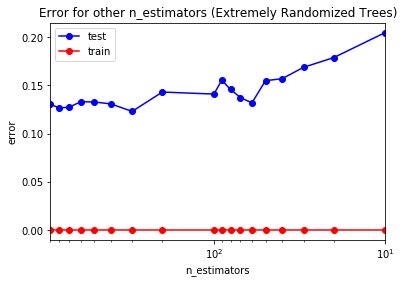

In [261]:
estimators = list(range(10, 100, 10)) + list(range(100, 1000, 100))
test_err = []
train_err = []
for elem in estimators:
    ert_temp = ensemble.ExtraTreesClassifier(n_estimators = elem).fit(X_train, y_train)

    y_train_pred = ert_temp.predict(X_train)
    y_test_pred = ert_temp.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    
plt.semilogx(estimators, test_err, 'b-o', label = 'test')
plt.semilogx(estimators, train_err, 'r-o', label = 'train')
plt.xlim([np.max(estimators), np.min(estimators)])
plt.title('Error for other n_estimators (Extremely Randomized Trees)')
plt.xlabel('n_estimators')
plt.ylabel('error')
plt.legend()
pass

print("Minimum error on test data: ", np.min(test_err))

### AdaBoost

In [264]:
ada = ensemble.AdaBoostClassifier(n_estimators = 1000)
ada.fit(X_train, y_train)

err_train = np.mean(y_train != ada.predict(X_train))
err_test = np.mean(y_test != ada.predict(X_test))

print(err_train, err_test)

0.52320230105465 0.5257257832710549


#### Подбираем параметр `n_estimators`

Minimum error on test data:  0.5206476956979975


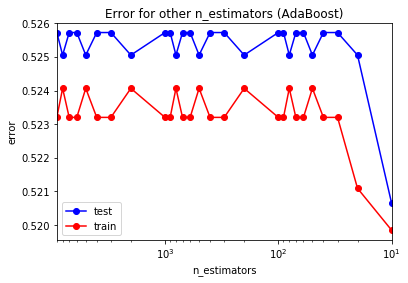

In [265]:
estimators = list(range(10, 100, 10)) + list(range(100, 1000, 100)) + list(range(1000, 10000, 1000))
test_err = []
train_err = []

for elem in estimators:
    ada_temp = ensemble.AdaBoostClassifier(n_estimators = elem).fit(X_train, y_train)

    y_train_pred = ada_temp.predict(X_train)
    y_test_pred = ada_temp.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    
plt.semilogx(estimators, test_err, 'b-o', label = 'test')
plt.semilogx(estimators, train_err, 'r-o', label = 'train')
plt.xlim([np.max(estimators), np.min(estimators)])
plt.title('Error for other n_estimators (AdaBoost)')
plt.xlabel('n_estimators')
plt.ylabel('error')
plt.legend()
pass

print("Minimum error on test data: ", np.min(test_err))

### Gradient Boosted Trees

In [266]:
gbt = ensemble.GradientBoostingClassifier(n_estimators = 1000)
gbt.fit(X_train, y_train)

err_train = np.mean(y_train != gbt.predict(X_train))
err_test = np.mean(y_test != gbt.predict(X_test))

print(err_train, err_test)

0.0 0.28389383922583117


#### Подбираем параметр `n_estimators`

Minimum error on test data:  0.28513940787582637


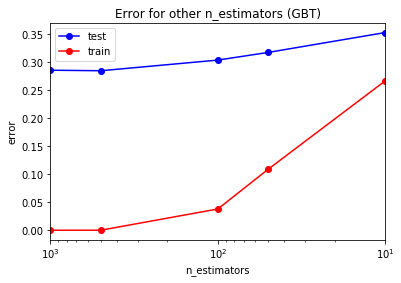

In [269]:
#estimators = list(range(10, 100, 10)) + list(range(100, 1000, 100)) + list(range(1000, 10000, 1000))
estimators = [10,50,100,500,1000]
test_err = []
train_err = []

for elem in estimators:
    gbt_temp = ensemble.GradientBoostingClassifier(n_estimators = elem).fit(X_train, y_train)

    y_train_pred = gbt_temp.predict(X_train)
    y_test_pred = gbt_temp.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    
plt.semilogx(estimators, test_err, 'b-o', label = 'test')
plt.semilogx(estimators, train_err, 'r-o', label = 'train')
plt.xlim([np.max(estimators), np.min(estimators)])
plt.title('Error for other n_estimators (GBT)')
plt.xlabel('n_estimators')
plt.ylabel('error')
plt.legend()
pass

print("Minimum error on test data: ", np.min(test_err))

### Вывод:

Все алгоритмы кроме AdaBoost дают переобучение.

# Лабораторная работа №4 - Метод главных компонент

### Найдем оптимальное количество компонент
Воспользуемся методом главных компонент для уменьшения размерности пространства признаков

Minimum error on test data:  0.3097633419565009


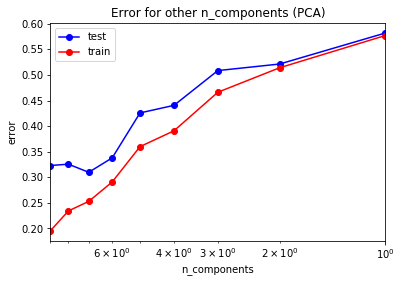

In [8]:
from sklearn import decomposition

test_err = []
train_err = []
list_components = list(range(1, 10))

for count_components in list_components:
    pca = decomposition.PCA(n_components = count_components).fit(X_train)
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)
    
    mlp_model = MLPClassifier(alpha = 0.6, hidden_layer_sizes = (50, 6),
                          solver = 'lbfgs', activation = 'logistic', random_state = 38, max_iter=700)
    mlp_model.fit(X_train_pca, y_train)

    y_train_pred = mlp_model.predict(X_train_pca)
    y_test_pred = mlp_model.predict(X_test_pca)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    
plt.semilogx(list_components, test_err, 'b-o', label = 'test')
plt.semilogx(list_components, train_err, 'r-o', label = 'train')
plt.xlim([np.max(list_components), np.min(list_components)])
plt.title('Error for other n_components (PCA)')
plt.xlabel('n_components')
plt.ylabel('error')
plt.legend()
pass

print("Minimum error on test data: ", np.min(test_err))

#### Вывод
Как можно заметить тестовая выборка хрошо себя показывает на 7 компонентах